# ARIMA and Seasonal ARIMA (SARIMA)


### The general process for ARIMA models is the following:

1) Visualize the Time Series Data

2) Make the time series data stationary

3) Plot the Correlation and AutoCorrelation Charts

4) Construct the ARIMA Model or Seasonal ARIMA based on the data

5) Use the model to make predictions


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import statsmodels.api as sms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [8]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.set_index('Month', inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

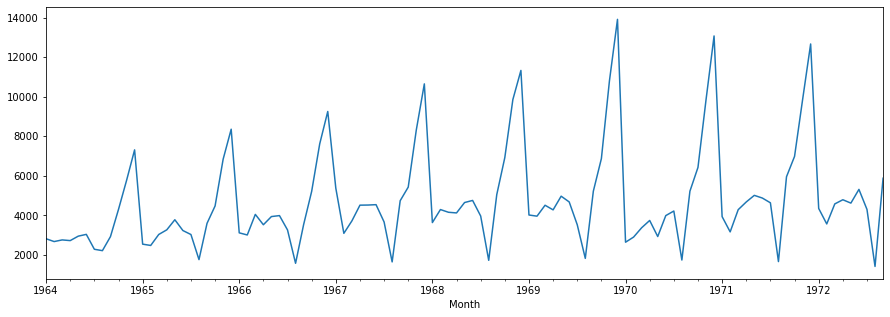

In [14]:
df.Sales.plot(figsize=(15,5))

In [15]:
## Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
# H0: It is non Stationary
# H1: It is Stationary 

def adfuller_func(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags used: {}'.format(result[2]))
    print('Number of Observation used: {}'.format(result[3]))
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [19]:
adfuller_func(df['Sales'])

ADF Statistics: -1.833593056327623
p-value: 0.363915771660245
lags used: 11
Number of Observation used: 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## Differencing

In [20]:
## Use Techniques Differencing
df['Sales first difference'] = df['Sales'] - df['Sales'].shift(1)

In [22]:
df[['Sales','Sales first difference']]

,Sales,Sales first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [24]:
adfuller_func(df['Sales first difference'].dropna())

ADF Statistics: -7.189896448051003
p-value: 2.5196204473870433e-10
lags used: 11
Number of Observation used: 92
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [26]:
df['Seasonal first difference'] = df['Sales']-df['Sales'].shift(12)
df['Seasonal first difference']

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Seasonal first difference, Length: 105, dtype: float64

In [27]:
adfuller_func(df['Seasonal first difference'].dropna())

ADF Statistics: -7.626619157213164
p-value: 2.060579696813685e-11
lags used: 0
Number of Observation used: 92
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

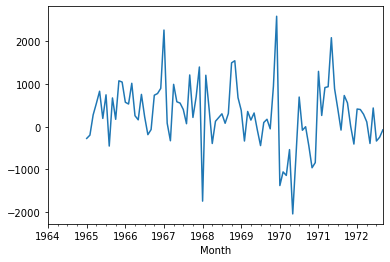

In [33]:
df['Seasonal first difference'].plot()

## Thoughts on Autocorrelation and Partial Autocorrelation





- Identification of an AR model is often best done with the PACF.



- Identification of an MA model is often best done with the ACF rather than the PACF.

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


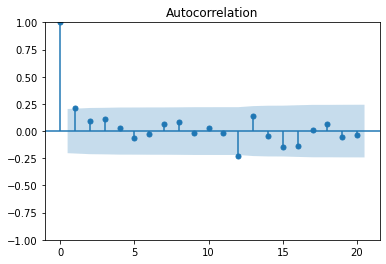

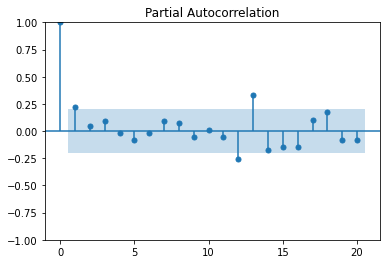

In [35]:
acf = plot_acf(df['Seasonal first difference'].dropna())
pacf = plot_pacf(df['Seasonal first difference'].dropna())

In [41]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1968,12,1)
test_dataset_end = datetime(1972,9,1)

In [42]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [45]:
##Prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [46]:
test_data

,Sales,Sales first difference,Seasonal first difference
Month,,,
1969-01-01,4016.0,-7315.0,383.0
1969-02-01,3957.0,-59.0,-335.0
1969-03-01,4510.0,553.0,356.0
1969-04-01,4276.0,-234.0,155.0
1969-05-01,4968.0,692.0,321.0
1969-06-01,4677.0,-291.0,-76.0
1969-07-01,3523.0,-1154.0,-442.0
1969-08-01,1821.0,-1702.0,98.0
1969-09-01,5222.0,3401.0,174.0


In [53]:
## create a ARIMA model
import statsmodels.api as sm

In [54]:
model_ARIMA=sm.tsa.arima.ARIMA(train_data['Sales'],order=(1,1,1))

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
model_arima_fit = model_ARIMA.fit()

In [57]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -527.139
Date:                Sat, 03 Dec 2022   AIC                           1060.277
Time:                        23:47:00   BIC                           1066.510
Sample:                    01-01-1964   HQIC                          1062.710
                         - 12-01-1968                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6018      0.254      2.373      0.018       0.105       1.099
ma.L1         -0.9277      0.191     -4.850      0.000      -1.303      -0.553
sigma2      3.327e+06   6.15e+05      5.409      0.000    2.12e+06    4.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.33   Prob(JB):                         0.29
Heteroskedasticity (H):               3.40   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/var/folders/nr/x5htffh97tvfw1rt32pzkmc00000gn/T/ipykernel_23036/3829162225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast'] = model_arima_fit.predict(start =pred_start_date, end= pred_end_date, dynamic = True)


<AxesSubplot:xlabel='Month'>

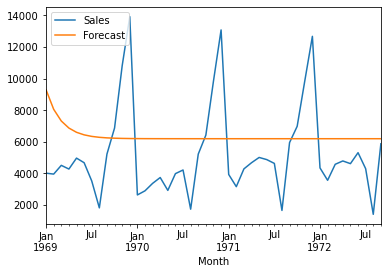

In [70]:
test_data['Forecast_Arima'] = model_arima_fit.predict(start =pred_start_date, end= pred_end_date, dynamic = True)
test_data[['Sales', 'Forecast_Arima']].plot()

In [71]:
test_data

,Sales,Sales first difference,Seasonal first difference,Forecast
Month,,,,
1969-01-01,4016.0,-7315.0,383.0,9286.025974
1969-02-01,3957.0,-59.0,-335.0,8055.285264
1969-03-01,4510.0,553.0,356.0,7314.580161
1969-04-01,4276.0,-234.0,155.0,6868.796541
1969-05-01,4968.0,692.0,321.0,6600.507534
1969-06-01,4677.0,-291.0,-76.0,6439.041326
1969-07-01,3523.0,-1154.0,-442.0,6341.865013
1969-08-01,1821.0,-1702.0,98.0,6283.380727
1969-09-01,5222.0,3401.0,174.0,6248.182729


<AxesSubplot:ylabel='Density'>

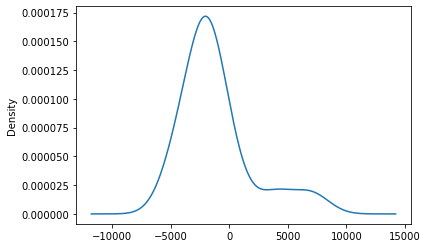

In [72]:
residuals = test_data['Sales'] - df['Forecast']
residuals.plot(kind='kde')

In [108]:
import statsmodels.api as sm
model_sarima = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99461D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05909D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18441D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06005D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.95880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [109]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sun, 04 Dec 2022   AIC                           1486.804
Time:                                    01:42:39   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1969-01-01 00:00:00
1972-09-01 00:00:00


In [111]:
pred_sarima = model_sarima_fit.predict(start=pred_start_date, end = pred_end_date, dynamic=True)
df['Pred_Sarima'] = pred_sarima

<AxesSubplot:xlabel='Month'>

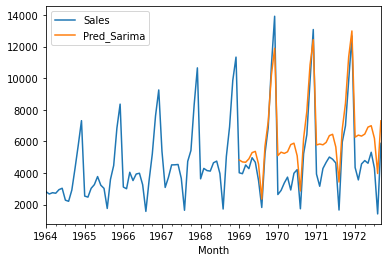

In [119]:
df[['Sales', 'Pred_Sarima']].plot()

In [113]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [114]:
future_dataset_df = pd.DataFrame(index= future_dates[1:], columns = df.columns)


In [115]:
future_df = pd.concat([df, future_dataset_df])

In [116]:
future_df.head()

,Sales,Sales first difference,Seasonal first difference,Forecast,Pred_Sarima
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN


In [117]:
future_df.tail()

,Sales,Sales first difference,Seasonal first difference,Forecast,Pred_Sarima
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

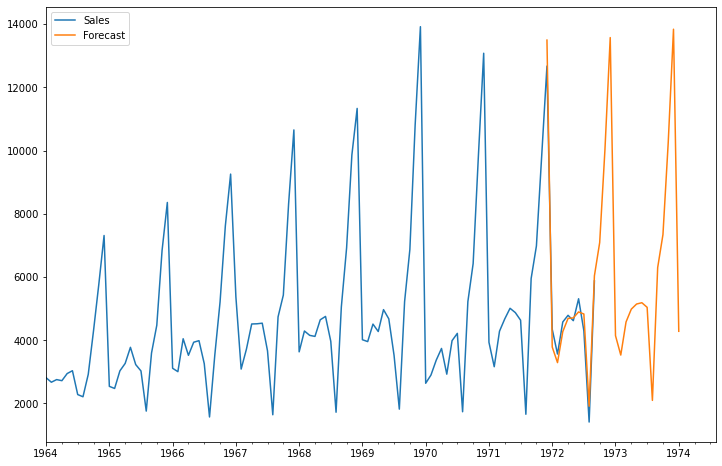

In [118]:
future_df['Forecast'] = model_sarima_fit.predict(start = 95, end =120, dynamic=True)
future_df[['Sales', 'Forecast']].plot(figsize=(12, 8)) 
